# Data Presentation: Sliding Window Time Series
Compatible with Qiskit 1.2.4+

### Author
- **Jacob Cybulski**, jacob.cybulski[at]deakin.edu.au<br/>
    School of IT, SEBE, Deakin University, Melbourne, Vic, Australia

### Date
- October 2022: Prepared for Workshop on Quantum Machine Learning, 13 October 2022, organised in collaboration with QWorld, QPoland, QIndia and Quantum AI Foundation. In association with IEEE Conference Trends in Quantum Computing and Emerging Business Technologies - TQCEBT 2022

### Aims
> *This script aims to create and save a data set.*

In [1]:
import sys
sys.path.append('.')
sys.path

['/home/jacob/miniconda3/envs/qiskit-gpu/lib/python311.zip',
 '/home/jacob/miniconda3/envs/qiskit-gpu/lib/python3.11',
 '/home/jacob/miniconda3/envs/qiskit-gpu/lib/python3.11/lib-dynload',
 '',
 '/home/jacob/miniconda3/envs/qiskit-gpu/lib/python3.11/site-packages',
 '.']

In [2]:
import os
import numpy as np

from utils.Target import *
from utils.Window import *
from utils.Charts import *
from utils.Files import *

import matplotlib.pyplot as plt
from matplotlib import set_loglevel
set_loglevel("error")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## <font color="salmon"><b>Enter the log name and a unique data ID from the "log/data" folder</b></font>

In [3]:
### Select data to load
LOG_NAME = 'log_3'
DATA_ID = '2_sins_sw_t70_v30_z0.0_w5_s1_h1'

### Show the selected data ID
print(f'LOG_NAME = {LOG_NAME}, Selected DATA_ID = {DATA_ID}')

LOG_NAME = log_3, Selected DATA_ID = 2_sins_sw_t70_v30_z0.0_w5_s1_h1


## Controls

In [4]:
### Listing control
debug = True

### Software version
MAJOR = 9
MINOR = 0

## Define folder locations

In [5]:
### Constants
DATA_PATH = f'{LOG_NAME}/data'
FIGURES_PATH = f'{LOG_NAME}/figures'

### Show constants
print(f'DATA_PATH = {DATA_PATH}\n')

DATA_PATH = log_3/data



## Fetch all source data
*Note that this is a aliding windows data*

In [6]:
### All created files have the following codes:
#   t: training sample size
#   v: validation sample size
#   z: level of noise injected
#   w: window size
#   s: window step size
#   h: horizon size

data_info_fpath = f'{DATA_PATH}/{DATA_ID}/info.json'

### Read the info file
data_info = read_json_file(data_info_fpath)
    
print(f'\nSaved time series info in file "{data_info_fpath}":\n')
for k in data_info.keys():
    print(f"info['{k}'] = {data_info[k]}")
print()

### Retrieve data parameters
DATA_NAME = data_info['data_name']
DATA_MAJOR = data_info['major_version']
DATA_MINOR = data_info['minor_version']
samples_train = data_info['data_train']
samples_valid = data_info['data_valid']
noise = data_info['data_noise']
wind_size = data_info['wind_size'] # Should be zero
wind_step = data_info['wind_step'] # Should be zero
horizon = data_info['wind_horizon'] # Should be zero
data_creation_seed = data_info['seed']

### Inferred data parameters
samples = samples_train+samples_valid
train_pc = samples_train / samples


Saved time series info in file "log_3/data/2_sins_sw_t70_v30_z0.0_w5_s1_h1/info.json":

info['data_name'] = 2_sins_sw
info['major_version'] = 9
info['minor_version'] = 0
info['data_train'] = 70
info['data_valid'] = 30
info['data_noise'] = 0.0
info['wind_size'] = 5
info['wind_step'] = 1
info['wind_horizon'] = 1
info['seed'] = 2024



In [7]:
### Define file names

x_all_fpath = f'{DATA_PATH}/{DATA_ID}/x_all.arr'
y_all_fpath = f'{DATA_PATH}/{DATA_ID}/y_all.arr'

x_train_ts_fpath = f'{DATA_PATH}/{DATA_ID}/x_train_ts.arr'
y_train_ts_fpath = f'{DATA_PATH}/{DATA_ID}/y_train_ts.arr'
x_valid_ts_fpath = f'{DATA_PATH}/{DATA_ID}/x_valid_ts.arr'
y_valid_ts_fpath = f'{DATA_PATH}/{DATA_ID}/y_valid_ts.arr'

data_info_fpath = f'{DATA_PATH}/{DATA_ID}/info.json'
data_info_fpath

'log_3/data/2_sins_sw_t70_v30_z0.0_w5_s1_h1/info.json'

In [8]:
### Load data files
X_all = read_ts_file(x_all_fpath)[..., None]
y_all = read_ts_file(y_all_fpath)
X_train_ts = read_ts_file(x_train_ts_fpath)
y_train_ts = read_ts_file(y_train_ts_fpath)[..., None]
X_valid_ts = read_ts_file(x_valid_ts_fpath)
y_valid_ts = read_ts_file(y_valid_ts_fpath)[..., None]
print(f'\nLoaded time series data\n')


Loaded time series data



## Plot time-series data

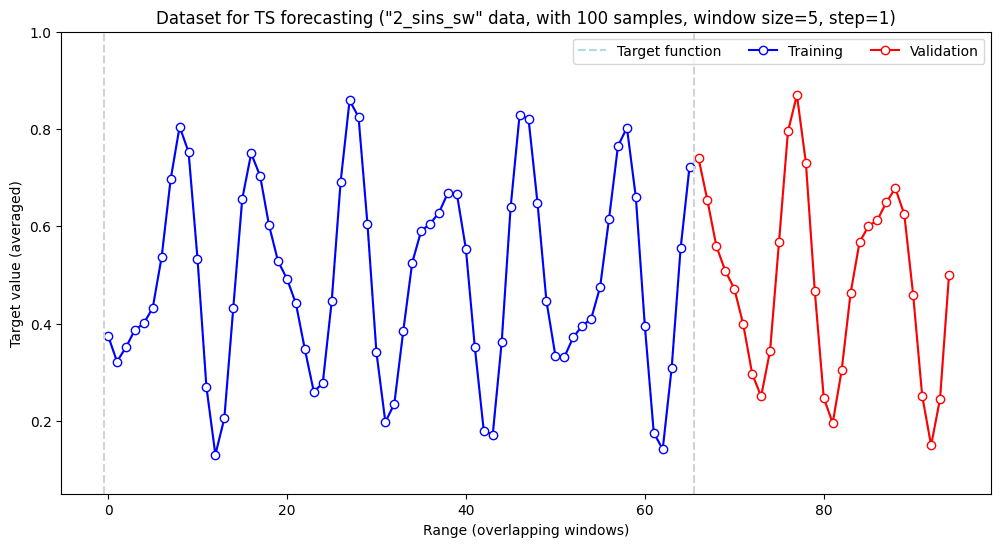

In [9]:
### Plot trainig and validation/test data partitions
#   Note that we will not use the X coordinates

y_all_select = y_all[wind_size:]
y_train_flat_ts = ts_wind_flatten_avg(y_train_ts, wind_step)
y_valid_flat_ts = ts_wind_flatten_avg(y_valid_ts, wind_step)
y_list = [y_all_select, y_train_flat_ts, y_valid_flat_ts]
X_list = [0, 0, len(y_train_flat_ts)]

print()
multi_plot_flat_ts(y_list, X_list=X_list, 
    colors = ['lightblue', 'blue', 'red'], 
    marker_colors=[None, 'white', 'white', 'lightblue', 'mistyrose'],
    labels = ['Target function', 'Training', 'Validation'], ylim=(0.05, 1),
    xlabel = 'Range (overlapping windows)', ylabel='Target value (averaged)',
    lines = ['dashed', 'solid', 'solid'], markers = [None, 'o', 'o'], legend_cols=3,
    title=f'Dataset for TS forecasting ("{DATA_NAME}" data, with {samples} samples, window size={wind_size}, step={wind_step})',
    save_plot=f'{FIGURES_PATH}/data_{DATA_ID}/train_and_valid.eps')
print()

## System

In [10]:
import sys
print(sys.prefix)

/home/jacob/miniconda3/envs/qiskit-gpu


In [11]:
!pip list | grep -e qiskit -e torch

qiskit                    1.2.4
qiskit-aer-gpu            0.15.1
qiskit-algorithms         0.3.1
qiskit-ibm-runtime        0.32.0
qiskit-machine-learning   0.7.2
qiskit-optimization       0.6.1
